In [1]:
# first step is to import the required libraries
# matplot library for plotting
# keras libraries to train our model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
# second step is to import the dataset and visualize
data= pd.read_csv('NSE-TATAGLOBAL.csv')
train_data= data.iloc[:, 1:2].values

In [3]:
# visualizing the data
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# next step is to do feature scaling
fs = MinMaxScaler(feature_range = (0, 1))
train_data_scale = fs.fit_transform(train_data)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(train_data_scale[i-60:i, 0])
    y_train.append(train_data_scale[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# now we will make a RNN model
# initialising the RNN
regressor = Sequential()

In [7]:
# Adding layers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #LAYER1
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) #LAYER2
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) #LAYER3
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) #LAYER4
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1)) #FINAL OUTPUT LAYER

# to compile the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [8]:
# training the model
regressor.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
62/62 [==============================] - 4s 59ms/step - loss: 0.0113
Epoch 2/80
62/62 [==============================] - 3s 55ms/step - loss: 0.0031
Epoch 3/80
62/62 [==============================] - 3s 56ms/step - loss: 0.0026
Epoch 4/80
62/62 [==============================] - 4s 57ms/step - loss: 0.0028
Epoch 5/80
62/62 [==============================] - 3s 56ms/step - loss: 0.0027
Epoch 6/80
62/62 [==============================] - 3s 54ms/step - loss: 0.0023
Epoch 7/80
62/62 [==============================] - 3s 54ms/step - loss: 0.0024
Epoch 8/80
62/62 [==============================] - 3s 53ms/step - loss: 0.0021
Epoch 9/80
62/62 [==============================] - 3s 52ms/step - loss: 0.0020
Epoch 10/80
62/62 [==============================] - 3s 53ms/step - loss: 0.0019
Epoch 11/80
62/62 [==============================] - 3s 53ms/step - loss: 0.0018
Epoch 12/80
62/62 [==============================] - 3s 53ms/step - loss: 0.0018
Epoch 13/80
62/62 [==================

In [9]:
# testing the model
test_data = pd.read_csv('tatatest.csv')
real_stock_price = test_data.iloc[:, 1:2].values

In [10]:
dataset_total = pd.concat((data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = fs.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = fs.inverse_transform(predicted_stock_price)

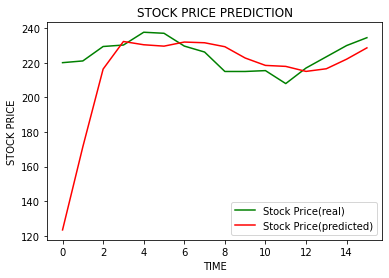

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'green', label = 'Stock Price(real)')
plt.plot(predicted_stock_price, color = 'red', label = 'Stock Price(predicted)')
plt.title('STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()